In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/MyDrive/'

 A3_files			    MakeupMid.ipynb
 cleaned_data.csv		   'Masters Capstone Project'
'Colab Notebooks'		    MS_Capstone_data
'Copy of Deepti_Baragi2.ipynb'	   'Recommender Systems - Project ppt.gslides'
 CV.gdoc			    rs_proj
 CV.pdf				    runs
 data_split.ipynb		   'Social Media Mining Assign3'
 Deepti_Baragi			    TC4
 Deepti_Baragi_CV.pdf		   'Template - Cyberdome Intern Questionnaire.docx'
'Deepti_Baragi – Homework 1.gdoc'   trail1.ipynb
'Deepti shout-out.mov'		    trial-1
 etext-all			   'Untitled document.gdoc'
'Fake Company Employees.gsheet'    'Untitled presentation (1).gslides'
'Fake Company.gsheet'		   'Untitled presentation.gslides'
'Flash cards.gslides'		    yelp_academic_dataset_review.json
 ImageSegmentationYOLOv8


Processing image: RIMG1052.JPG
1/1 [==============================] - 2s 2s/step


Processing image: RIMG1055.JPG
1/1 [==============================] - 2s 2s/step


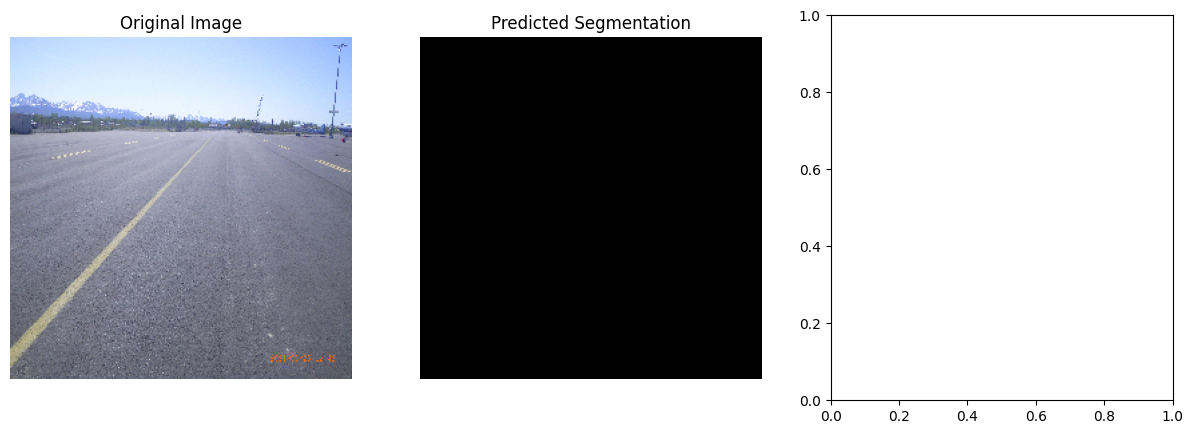

Processing image: R ST SE FROM 28TH PL SE TO 28TH ST SE (Pave) 2.jpg
1/1 [==============================] - 2s 2s/step


Processing image: POMEROY RD SE From STANTON RD SE To SHERIDAN RD SE (3).jpg
1/1 [==============================] - 3s 3s/step


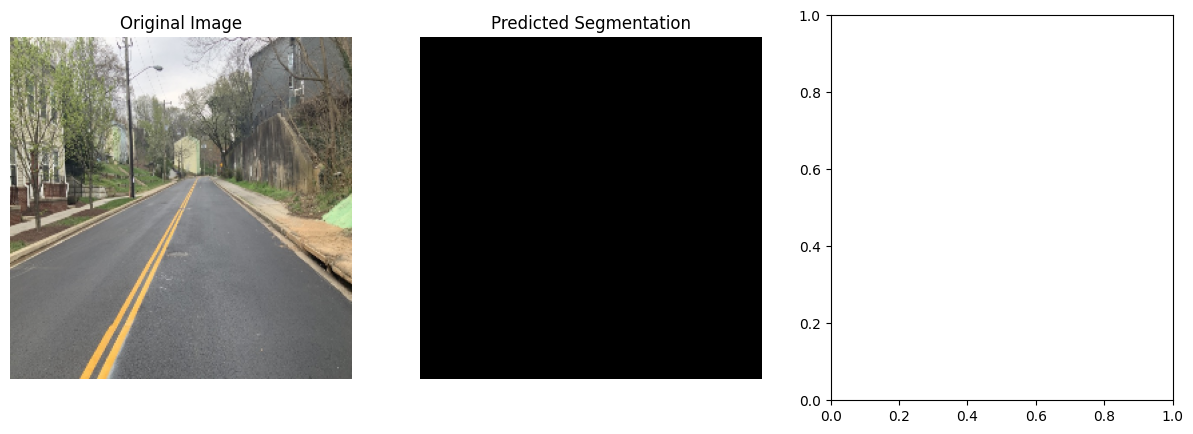

Processing image: RIMG1048.JPG
1/1 [==============================] - 2s 2s/step


Processing image: R ST SE FROM 28TH PL SE TO 28TH ST SE (Pave).jpg
1/1 [==============================] - 2s 2s/step


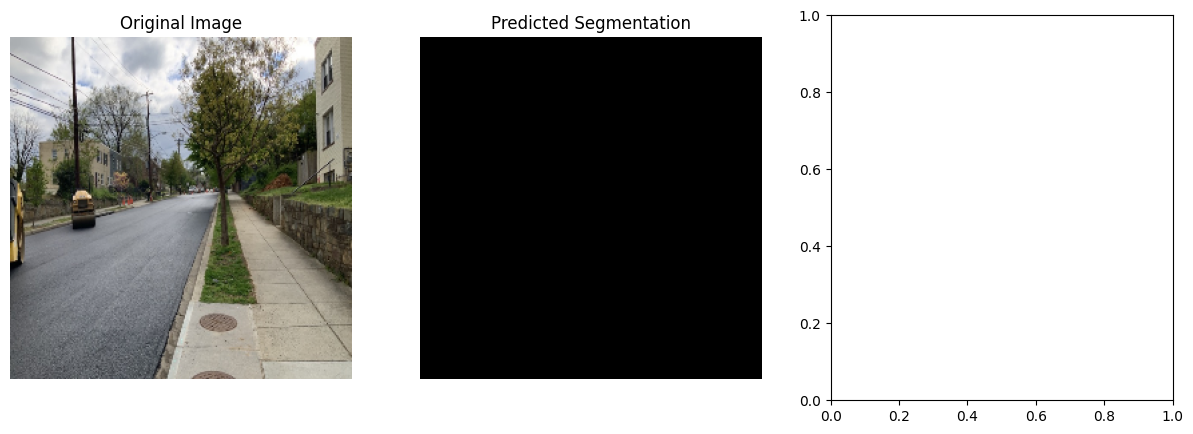

Processing image: Randle Cir SE from Branch Ave to Branch Ave (1).jpg
1/1 [==============================] - 2s 2s/step


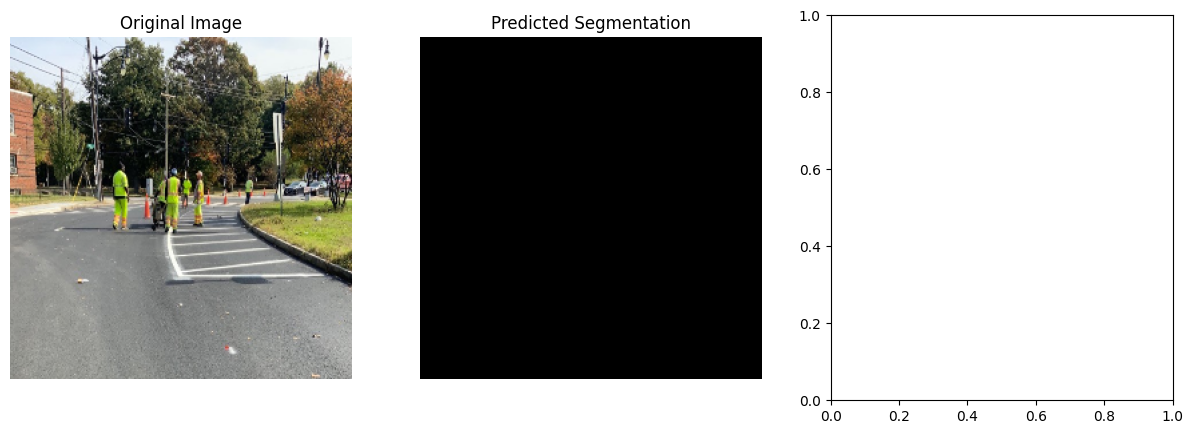

Processing image: RESERVOIR RD NW FROM 36TH ST NW TO 37 TH ST NW (1).jpg
1/1 [==============================] - 2s 2s/step


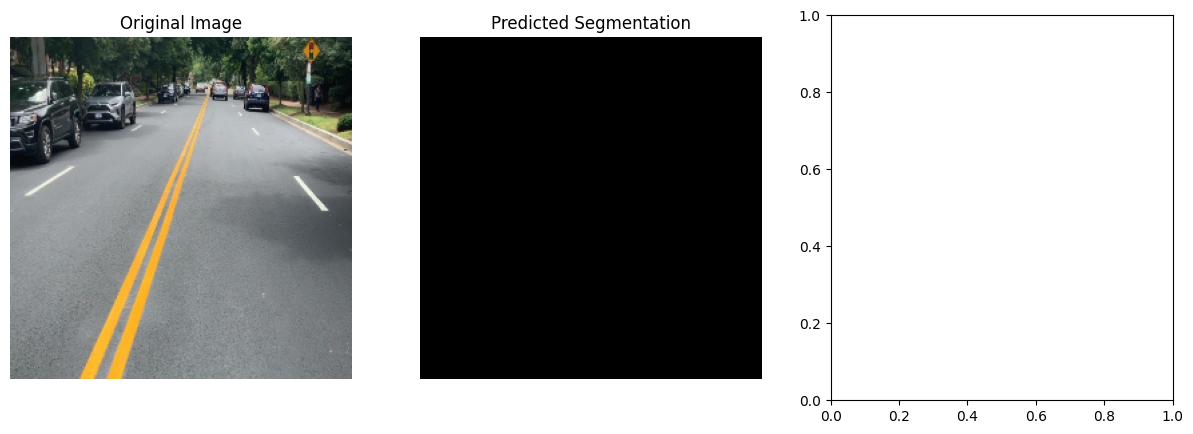

Processing image: US-59 S of Lawrence 8-9-12 paver seg.JPG
1/1 [==============================] - 2s 2s/step


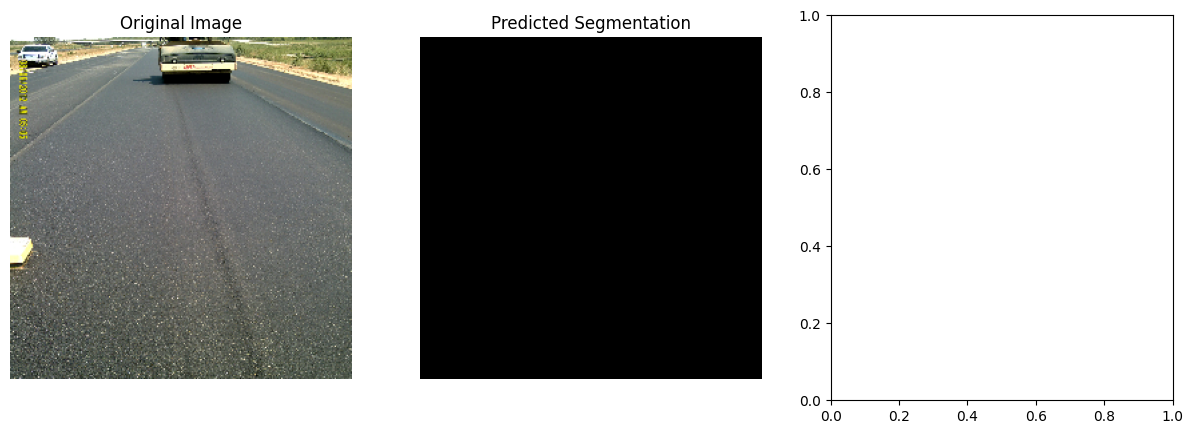

Processing image: RIMG1047.JPG
1/1 [==============================] - 2s 2s/step


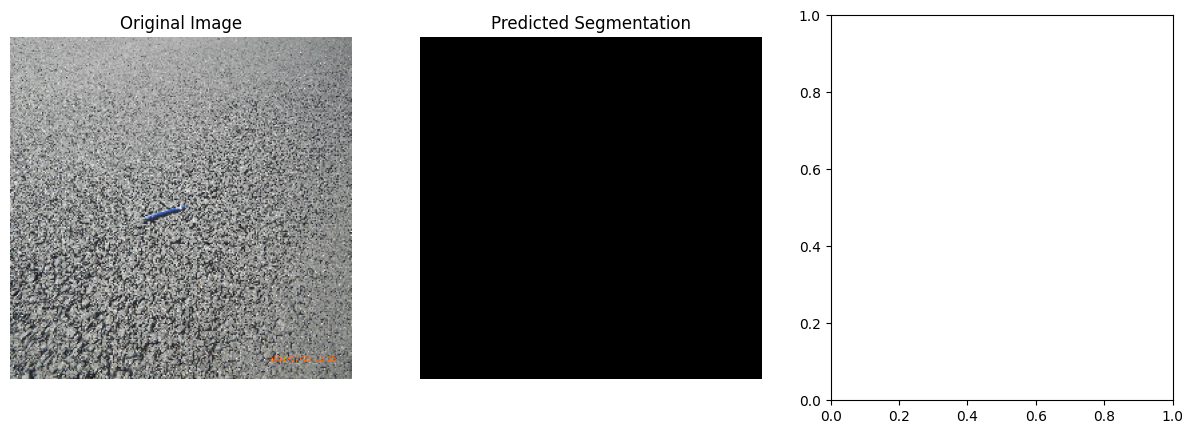

Processing image: SARGENT RD NE FROM GALLATIN ST NE TO GALLOWAY ST NE.jpg
1/1 [==============================] - 2s 2s/step


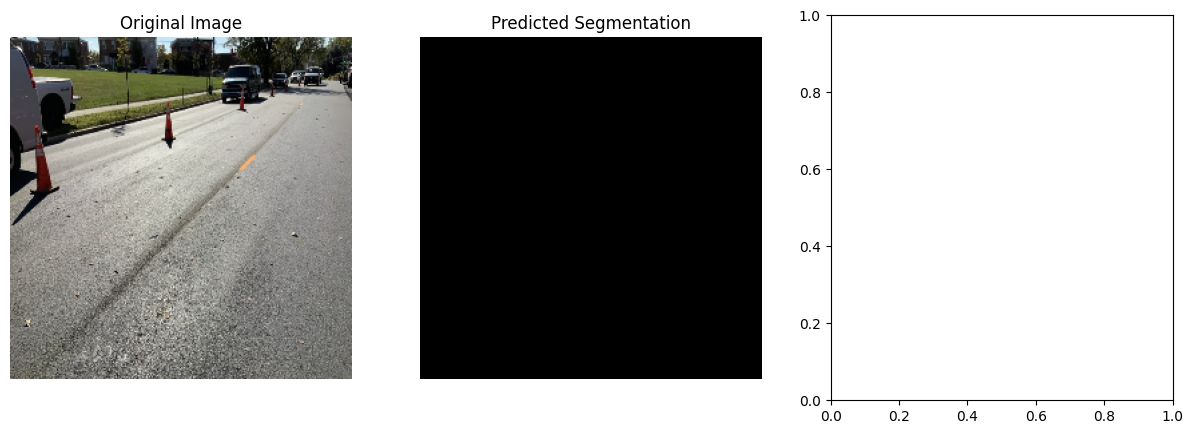

Processing image: RIMG1064.JPG
1/1 [==============================] - 4s 4s/step


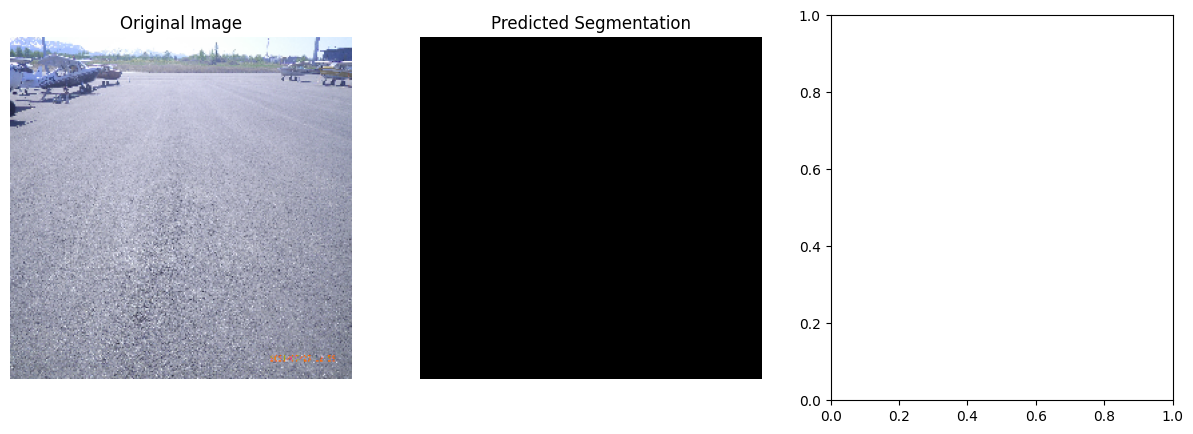

Processing image: Orange St SE from 4th St to 5th St (2).jpg
1/1 [==============================] - 2s 2s/step


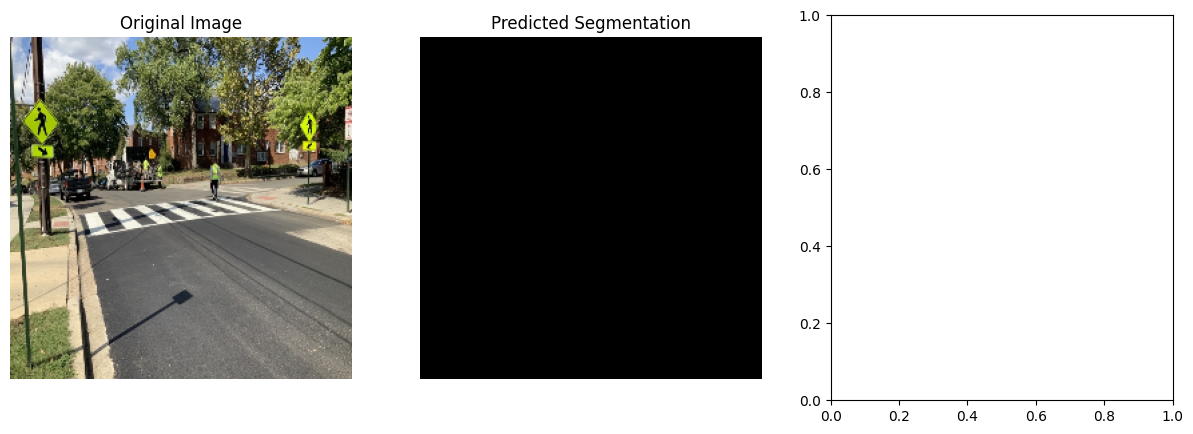

Processing image: RANDOLPH ST NE FROM 4TH ST NE TO 5TH ST NE.jpg
1/1 [==============================] - 2s 2s/step


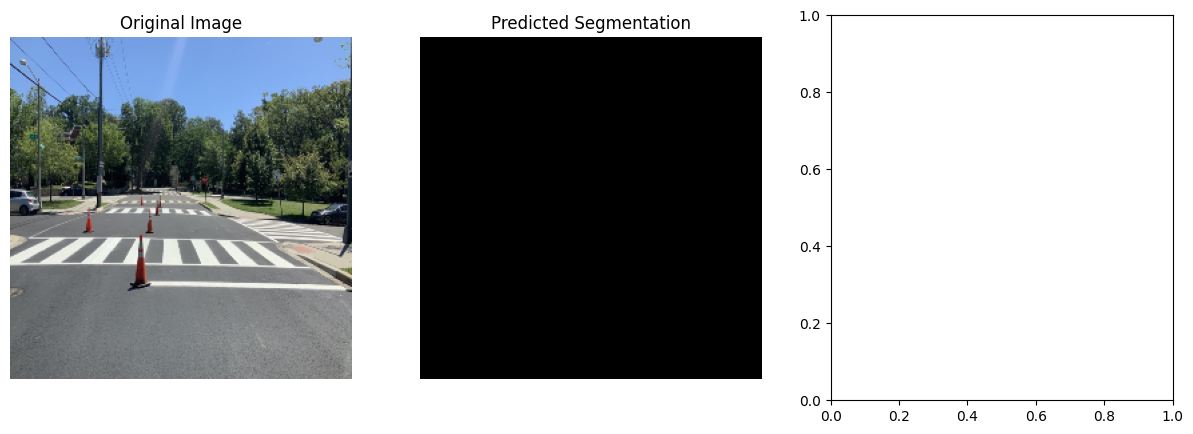

Processing image: RIMG1046.JPG
1/1 [==============================] - 2s 2s/step


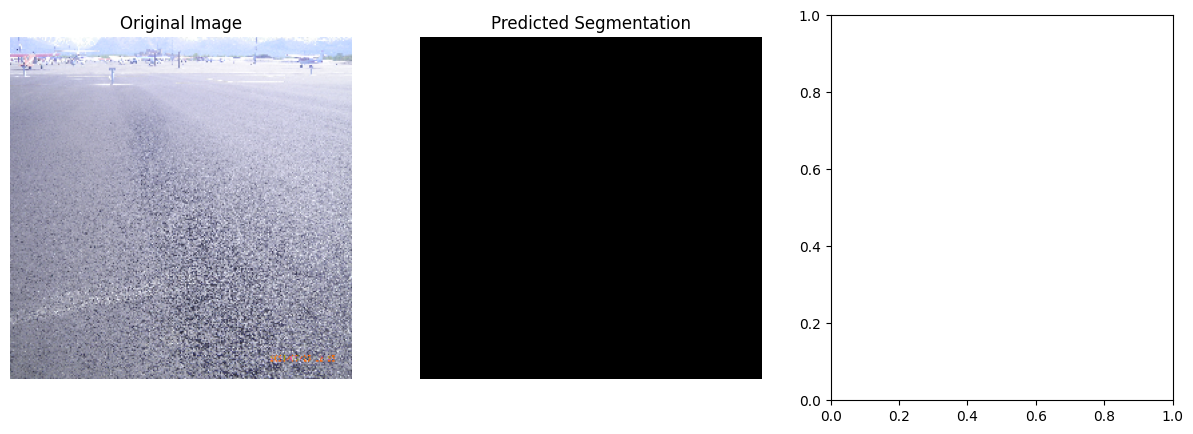

Processing image: Valley Ave SE from 4th St to 9th St (2)A.jpg
1/1 [==============================] - 3s 3s/step


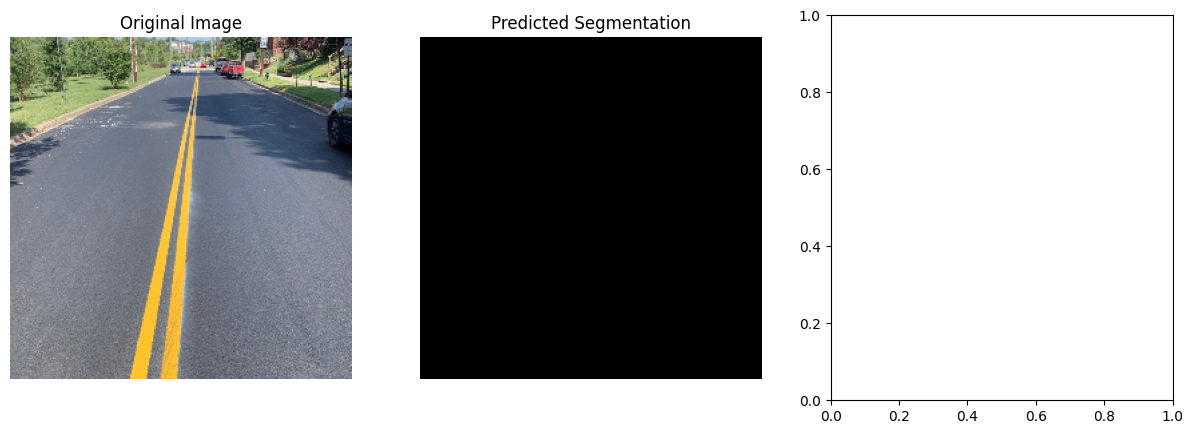

Processing image: PINEY BRANCH RD NW FROM DECATUR ST NW TO DELAFIELD PL NW (1).jpg
1/1 [==============================] - 2s 2s/step


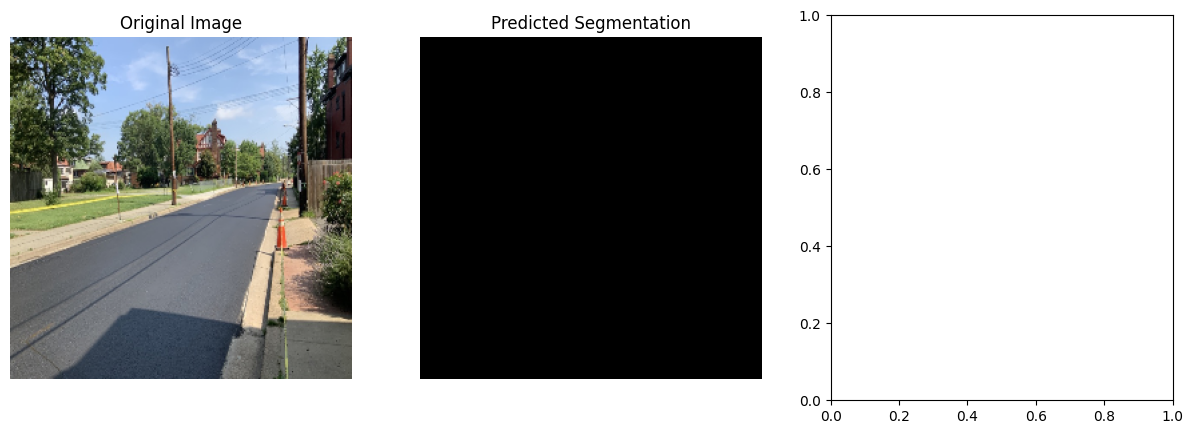

Processing image: RIMG1051.JPG
1/1 [==============================] - 2s 2s/step


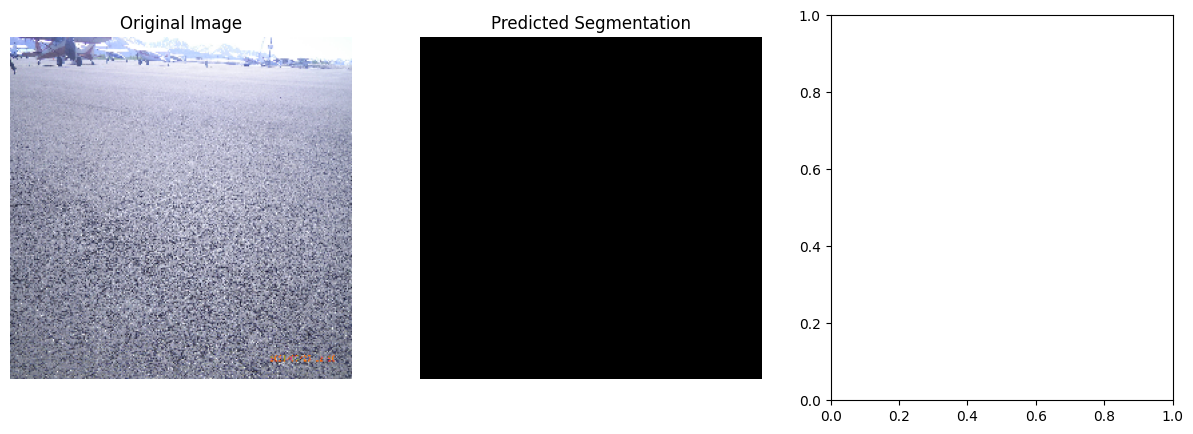

Processing image: RIMG1042.JPG
1/1 [==============================] - 2s 2s/step


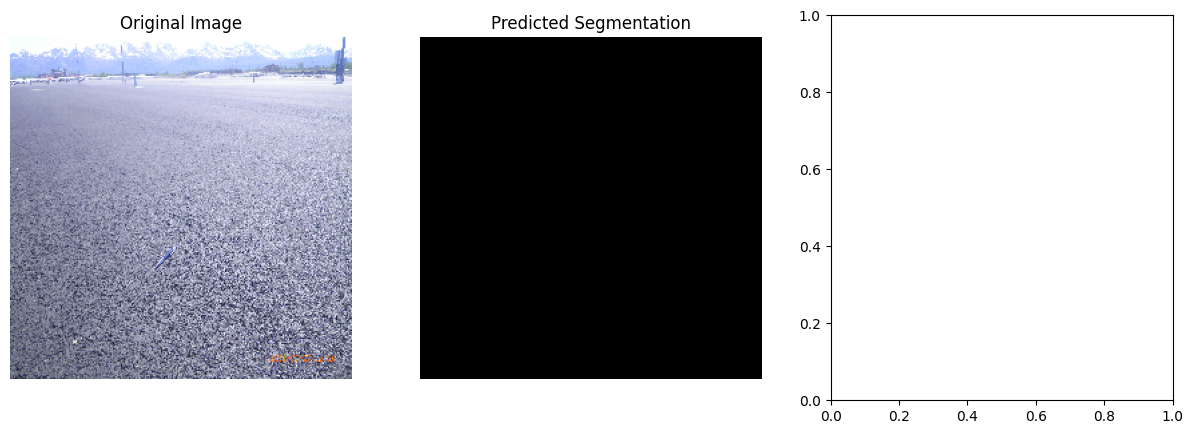

Processing image: RIMG1368.JPG
1/1 [==============================] - 3s 3s/step


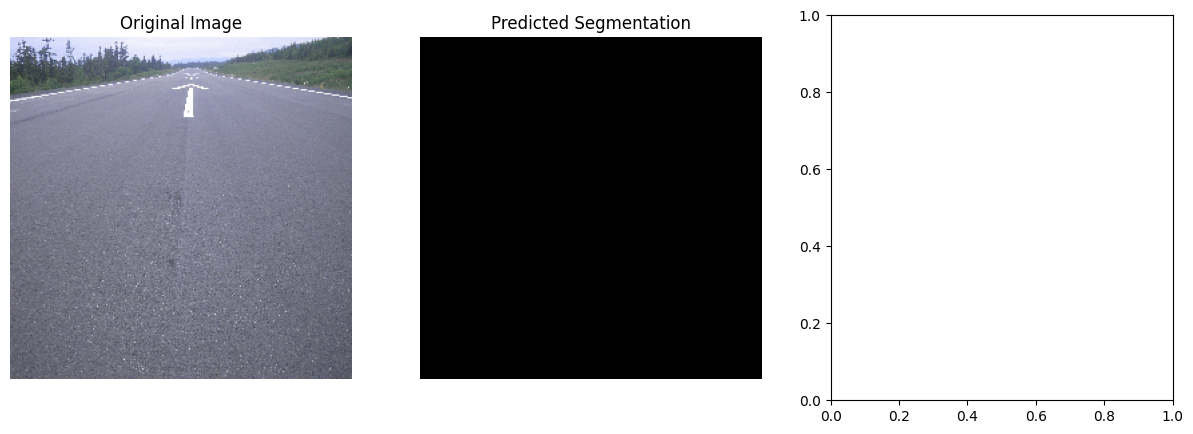

Processing image: South Capitol St BN- Overlook Ave SW to Halley Pl, MLK Jr Ave SE (1).jpg
1/1 [==============================] - 2s 2s/step


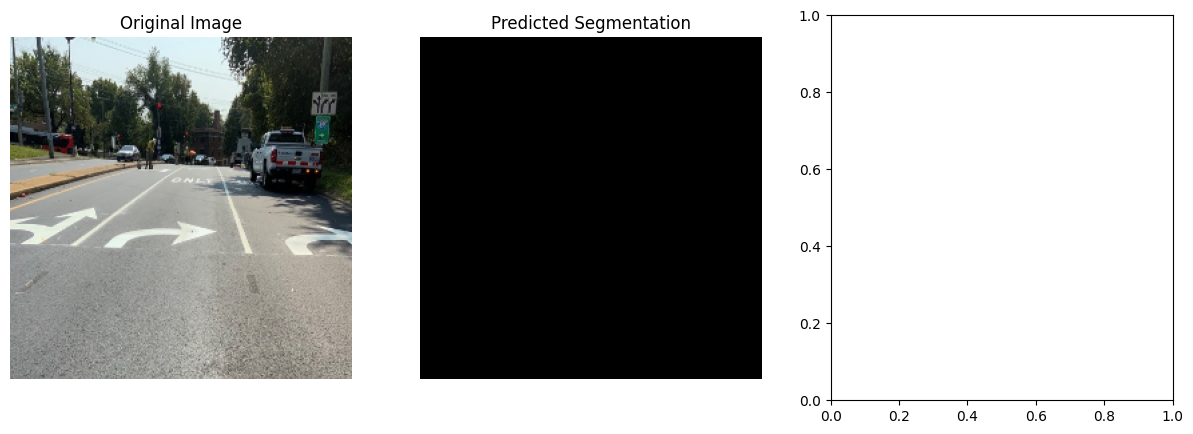

Processing image: PATTERSON ST NW FROM 32ND ST NW TO 33RD ST NW.jpg
1/1 [==============================] - 2s 2s/step


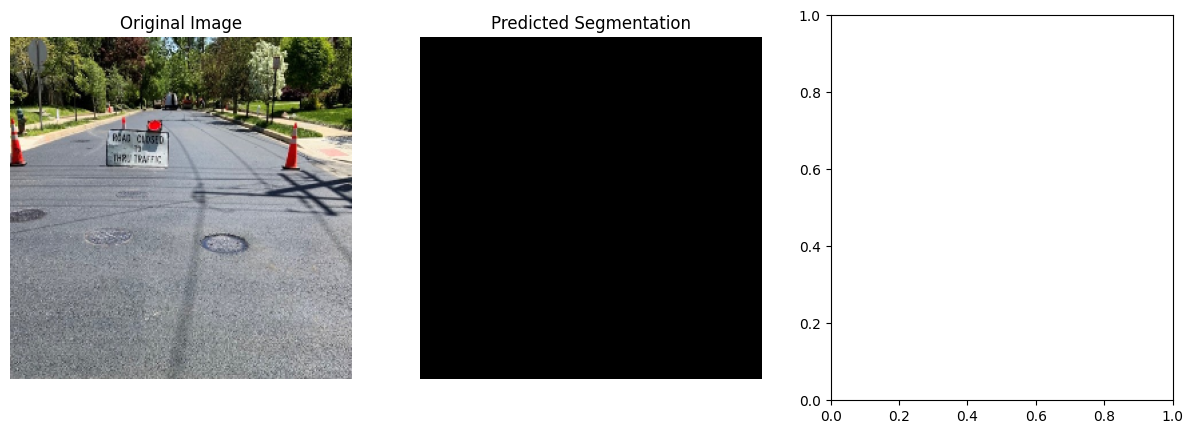

Processing image: POMEROY RD SE From STANTON RD SE To SHERIDAN RD SE (4).jpg
1/1 [==============================] - 2s 2s/step


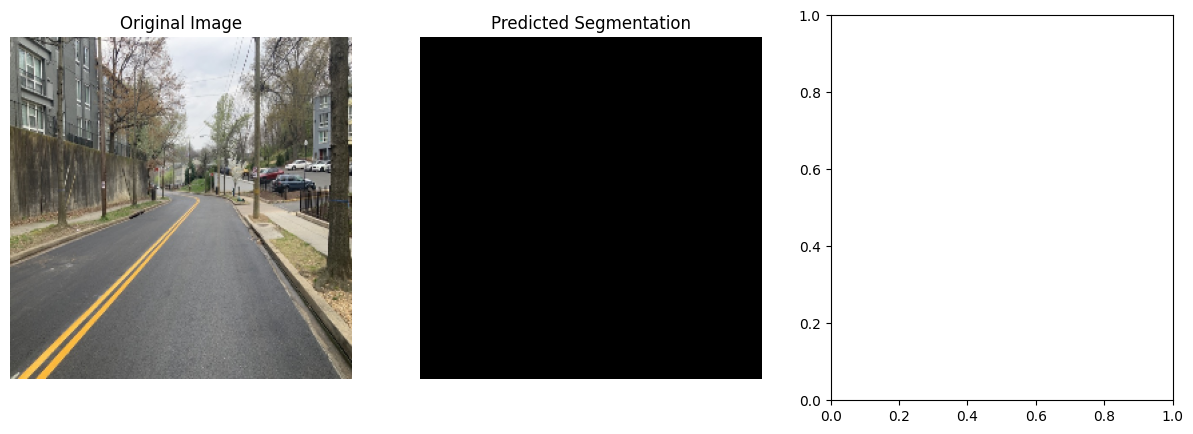

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


model_path = '/content/gdrive/MyDrive/ImageSegmentationYOLOv8/Image_Seg_Unet/trained_model.h5'
model = load_model(model_path)


def predict_on_images(model, images_folder, output_folder):

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_filename in os.listdir(images_folder):
        print("Processing image:", image_filename)
        img = cv2.imread(os.path.join(images_folder, image_filename))
        if img is None:
            print("Error: Unable to read image:", image_filename)
            continue
        img = cv2.resize(img, (256, 256))  # Resize images to match the input shape
        img_normalized = img / 255.0  # Normalize pixel values to [0, 1]

        # Make prediction
        prediction = model.predict(np.expand_dims(img_normalized, axis=0))[0]
        prediction = (prediction > 0.5).astype(np.uint8) * 255  # Threshold prediction

        # Plot original image, ground truth label, and prediction
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Original Image")
        axes[0].axis('off')
        axes[1].imshow(cv2.cvtColor(prediction, cv2.COLOR_GRAY2RGB))
        axes[1].set_title("Predicted Segmentation")
        axes[1].axis('off')

        # Save prediction
        prediction_filename = os.path.join(output_folder, image_filename.split('.')[0] + '_prediction.png')
        cv2.imwrite(prediction_filename, prediction)

        plt.show()


val_images_folder = '/content/gdrive/MyDrive/ImageSegmentationYOLOv8/Image_Seg_Unet/images/val/'
output_folder = '/content/gdrive/MyDrive/ImageSegmentationYOLOv8/Image_Seg_Unet/predictions/'

# Make predictions on validation images
predict_on_images(model, val_images_folder, output_folder)


Saw that the prediction of segmentation is not giving any results. So updating the code to check on  training images instead of the validation images. This way, we can verify if the model is able to predict segmentation markings on images it was trained on.